In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import math


In [2]:
us_pharm = pd.read_csv('us_pharma_patent_data_lowe_smiles_can_unique_stereochem.txt', header=None, sep='\t')

In [3]:
us_pharm

,0
0,CC[Si](CC)(CC)OC(C)(C)C#CCO[C@H](C)C1=CC[C@H]2...
1,COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@H](O...
2,CC1(C)COP(=O)(O)OC1c1ccc2ccccc2c1
3,Nc1cc(F)ccc1C(=O)NCCN1CCC2(CC1)C(=O)NCN2c1ccc(...
4,COc1ccccc1-c1ccc(C(=O)OC(C)(C)C)c(NC(=O)c2cncc...
...,...
881350,CC1(C)OB(c2cc3ccc(O)cc3cc2OCc2ccccc2)OC1(C)C
881351,CCN(CC)c1nc2ccc(NC(=O)c3c(C(=O)N4CCOCC4)cnn3C)...
881352,O=C([O-])c1ccc(OCCNC(=O)c2ccc(Cl)cc2)cc1
881353,Cc1ccc(N)cc1N1CCN(C)CC1


In [4]:
#Check smiles lenght
us_pharm['smiles_length'] = us_pharm[0].apply(len)

Text(0, 0.5, 'Frequency')

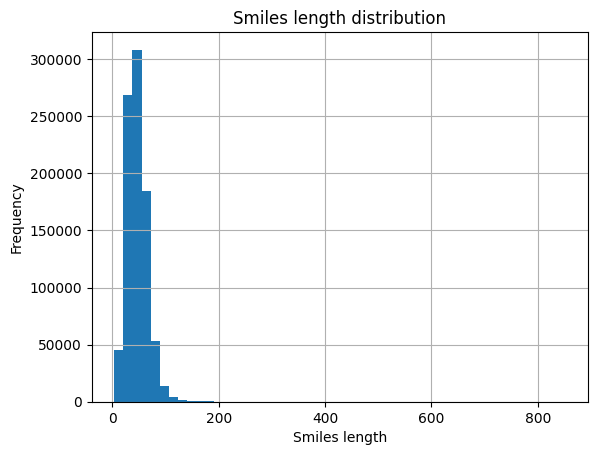

In [7]:
us_pharm['smiles_length'].hist(bins=50)
plt.title('Smiles length distribution')
plt.xlabel('Smiles length')
plt.ylabel('Frequency')
#plt.savefig('smiles_length_distribution.svg')

In [8]:
#filter out smiles longer than 90
us_pharm = us_pharm[us_pharm['smiles_length'] < 90]
us_pharm

,0,smiles_length
1,COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@H](O...,65
2,CC1(C)COP(=O)(O)OC1c1ccc2ccccc2c1,33
3,Nc1cc(F)ccc1C(=O)NCCN1CCC2(CC1)C(=O)NCN2c1ccc(...,51
4,COc1ccccc1-c1ccc(C(=O)OC(C)(C)C)c(NC(=O)c2cncc...,62
5,COc1ccccc1-c1cc(NC(=O)C2CCNCC2)ncn1,35
...,...,...
881350,CC1(C)OB(c2cc3ccc(O)cc3cc2OCc2ccccc2)OC1(C)C,44
881351,CCN(CC)c1nc2ccc(NC(=O)c3c(C(=O)N4CCOCC4)cnn3C)...,51
881352,O=C([O-])c1ccc(OCCNC(=O)c2ccc(Cl)cc2)cc1,40
881353,Cc1ccc(N)cc1N1CCN(C)CC1,23


In [3]:
Bdb = pd.read_csv("BindingDB_clean.csv", delimiter="\t", usecols=["ChEMBL ID of Ligand","Ligand SMILES", 'IC50 (nM)', "Target Name",'UniProt (SwissProt) Primary ID of Target Chain'], on_bad_lines='skip')
Bdb

/tmp/ipykernel_203072/2021772864.py:1: DtypeWarning: Columns (9,32) have mixed types. Specify dtype option on import or set low_memory=False.
  Bdb = pd.read_csv("BindingDB.tsv", delimiter="\t", usecols=["ChEMBL ID of Ligand","Ligand SMILES", 'IC50 (nM)', "Target Name",'UniProt (SwissProt) Primary ID of Target Chain'], on_bad_lines='skip')


,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain
0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],NaN,NaN,P03367
1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],NaN,NaN,P03367
2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],NaN,NaN,P03367
3,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],NaN,NaN,P03367
4,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],NaN,NaN,P03367
...,...,...,...,...,...
2875629,C[C@@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2ccc(...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,P37238
2875630,CC[C@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2ccc(...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,P37238
2875631,CC[C@@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2ccc...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,P37238
2875632,CC(C)[C@@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,P37238


In [3]:
# remove rows with missing values
Bdb = Bdb.dropna(subset=["IC50 (nM)"])
Bdb

,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain
142,Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C...,Cytochrome P450 3A4,>50000,NaN,P08684
144,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,Galactokinase,6676.9,NaN,P51570
180,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,Dimer of Gag-Pol polyprotein [489-587],8.5,NaN,P12497
181,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,Dimer of Gag-Pol polyprotein [489-587],177,CHEMBL324572,P12497
183,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,Dimer of Gag-Pol polyprotein [489-587],164,NaN,P12497
...,...,...,...,...,...
2875481,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,High affinity nerve growth factor receptor,26,NaN,P04629
2875482,OC1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc3cc(...,BDNF/NT-3 growth factors receptor,90,NaN,Q16620
2875483,O[C@@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(C...,BDNF/NT-3 growth factors receptor,90,NaN,Q16620
2875484,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,BDNF/NT-3 growth factors receptor,118,NaN,Q16620


In [4]:
#convert ki values to floats
Bdb["IC50 (nM)"] = Bdb["IC50 (nM)"].str.replace(">", "").str.replace("<", "").str.replace("~", "").str.replace(" ", "").astype(float)
#create a new column with the IC50 in molar units
Bdb["IC50 (M)"] = Bdb["IC50 (nM)"] * 10**-9
#convert IC50 values to pIC50 and store in a new column


/tmp/ipykernel_9535/3461489333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bdb["IC50 (nM)"] = Bdb["IC50 (nM)"].str.replace(">", "").str.replace("<", "").str.replace("~", "").str.replace(" ", "").astype(float)
/tmp/ipykernel_9535/3461489333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bdb["IC50 (M)"] = Bdb["IC50 (nM)"] * 10**-9


In [5]:
BdbB = Bdb[Bdb['UniProt (SwissProt) Primary ID of Target Chain'] == "P56817"]
BdbB

,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain,IC50 (M)
11798,CCSc1cnc(cn1)C(=O)Nc1cccc(c1)[C@]1(C)CCSC(N)=N1,Beta-secretase 1,70.0,NaN,P56817,7.000000e-08
23068,C[C@]1(CCSC(N)=N1)c1cc(NC(=O)CCc2ccc(O)c(O)c2)...,Beta-secretase 1,5960.0,NaN,P56817,5.960000e-06
25934,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,14.0,NaN,P56817,1.400000e-08
26872,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,42.0,NaN,P56817,4.200000e-08
26898,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,109.0,NaN,P56817,1.090000e-07
...,...,...,...,...,...,...
2863446,FC(F)(F)c1ccc(N\N=C\c2coc3cc4oc(cc4cc3c2=O)-c2...,Beta-secretase 1,32800.0,NaN,P56817,3.280000e-05
2863447,COc1ccc(cc1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(c...,Beta-secretase 1,25300.0,NaN,P56817,2.530000e-05
2863448,COc1ccc(CN(CCN(C)CCN)c2ccccn2)cc1,Beta-secretase 1,13600.0,CHEMBL416378,P56817,1.360000e-05
2863449,Fc1cccc(c1)-c1cc2c(ccc3c2occ(\C=N\Nc2ccc(cc2)C...,Beta-secretase 1,15800.0,NaN,P56817,1.580000e-05


In [6]:
#see how many P56817 are in the combined dataframe
beta = Bdb[Bdb["UniProt (SwissProt) Primary ID of Target Chain"] == "P56817"]
beta

,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain,IC50 (M)
11798,CCSc1cnc(cn1)C(=O)Nc1cccc(c1)[C@]1(C)CCSC(N)=N1,Beta-secretase 1,70.0,NaN,P56817,7.000000e-08
23068,C[C@]1(CCSC(N)=N1)c1cc(NC(=O)CCc2ccc(O)c(O)c2)...,Beta-secretase 1,5960.0,NaN,P56817,5.960000e-06
25934,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,14.0,NaN,P56817,1.400000e-08
26872,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,42.0,NaN,P56817,4.200000e-08
26898,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,109.0,NaN,P56817,1.090000e-07
...,...,...,...,...,...,...
2863446,FC(F)(F)c1ccc(N\N=C\c2coc3cc4oc(cc4cc3c2=O)-c2...,Beta-secretase 1,32800.0,NaN,P56817,3.280000e-05
2863447,COc1ccc(cc1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(c...,Beta-secretase 1,25300.0,NaN,P56817,2.530000e-05
2863448,COc1ccc(CN(CCN(C)CCN)c2ccccn2)cc1,Beta-secretase 1,13600.0,CHEMBL416378,P56817,1.360000e-05
2863449,Fc1cccc(c1)-c1cc2c(ccc3c2occ(\C=N\Nc2ccc(cc2)C...,Beta-secretase 1,15800.0,NaN,P56817,1.580000e-05


In [7]:
beta = beta.drop_duplicates(subset=["Ligand SMILES"])
beta

,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain,IC50 (M)
11798,CCSc1cnc(cn1)C(=O)Nc1cccc(c1)[C@]1(C)CCSC(N)=N1,Beta-secretase 1,70.0,NaN,P56817,7.000000e-08
23068,C[C@]1(CCSC(N)=N1)c1cc(NC(=O)CCc2ccc(O)c(O)c2)...,Beta-secretase 1,5960.0,NaN,P56817,5.960000e-06
25934,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,14.0,NaN,P56817,1.400000e-08
26872,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,42.0,NaN,P56817,4.200000e-08
26898,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,109.0,NaN,P56817,1.090000e-07
...,...,...,...,...,...,...
2863445,Fc1cccc(c1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(cc...,Beta-secretase 1,17300.0,NaN,P56817,1.730000e-05
2863446,FC(F)(F)c1ccc(N\N=C\c2coc3cc4oc(cc4cc3c2=O)-c2...,Beta-secretase 1,32800.0,NaN,P56817,3.280000e-05
2863447,COc1ccc(cc1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(c...,Beta-secretase 1,25300.0,NaN,P56817,2.530000e-05
2863449,Fc1cccc(c1)-c1cc2c(ccc3c2occ(\C=N\Nc2ccc(cc2)C...,Beta-secretase 1,15800.0,NaN,P56817,1.580000e-05


/tmp/ipykernel_9535/753269266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta["pIC50"] = beta["IC50 (M)"].apply(lambda x: -1 * (x and math.log10(x)))


<Axes: >

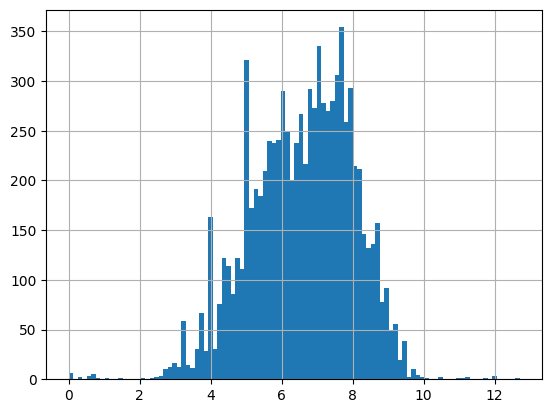

In [8]:
#Convert standard_value to pIC50
beta["pIC50"] = beta["IC50 (M)"].apply(lambda x: -1 * (x and math.log10(x)))
#histogram pIC50 values
beta["pIC50"].hist(bins=100)
#Add labels

In [9]:
rd_mols = [Chem.MolFromSmiles(smiles) for smiles in beta["Ligand SMILES"]]

[16:07:56] Explicit valence for atom # 18 N, 4, is greater than permitted


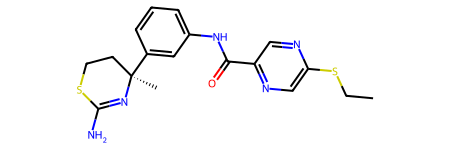

In [10]:
rd_mols[0]

In [11]:
beta["RDkit Molecule"] = rd_mols
del rd_mols

/tmp/ipykernel_9535/3380609886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta["RDkit Molecule"] = rd_mols


In [12]:
beta.dropna(subset=["RDkit Molecule"], inplace=True)

/tmp/ipykernel_9535/251403140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta.dropna(subset=["RDkit Molecule"], inplace=True)


In [13]:
beta

,Ligand SMILES,Target Name,IC50 (nM),ChEMBL ID of Ligand,UniProt (SwissProt) Primary ID of Target Chain,IC50 (M),pIC50,RDkit Molecule
11798,CCSc1cnc(cn1)C(=O)Nc1cccc(c1)[C@]1(C)CCSC(N)=N1,Beta-secretase 1,70.0,NaN,P56817,7.000000e-08,7.154902,<rdkit.Chem.rdchem.Mol object at 0x7f5a619c1310>
23068,C[C@]1(CCSC(N)=N1)c1cc(NC(=O)CCc2ccc(O)c(O)c2)...,Beta-secretase 1,5960.0,NaN,P56817,5.960000e-06,5.224754,<rdkit.Chem.rdchem.Mol object at 0x7f5a619c1460>
25934,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,14.0,NaN,P56817,1.400000e-08,7.853872,<rdkit.Chem.rdchem.Mol object at 0x7f5a619c1380>
26872,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,42.0,NaN,P56817,4.200000e-08,7.376751,<rdkit.Chem.rdchem.Mol object at 0x7f5a619c2b20>
26898,COc1nc(nc(C)c1F)N1C[C@H]2C(=O)N(C)C(=N)N[C@]2(...,Beta-secretase 1,109.0,NaN,P56817,1.090000e-07,6.962574,<rdkit.Chem.rdchem.Mol object at 0x7f5a619c2b90>
...,...,...,...,...,...,...,...,...
2863445,Fc1cccc(c1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(cc...,Beta-secretase 1,17300.0,NaN,P56817,1.730000e-05,4.761954,<rdkit.Chem.rdchem.Mol object at 0x7f5a48aed700>
2863446,FC(F)(F)c1ccc(N\N=C\c2coc3cc4oc(cc4cc3c2=O)-c2...,Beta-secretase 1,32800.0,NaN,P56817,3.280000e-05,4.484126,<rdkit.Chem.rdchem.Mol object at 0x7f5a48aed770>
2863447,COc1ccc(cc1)-c1cc2cc3c(cc2o1)occ(\C=N\Nc1ccc(c...,Beta-secretase 1,25300.0,NaN,P56817,2.530000e-05,4.596879,<rdkit.Chem.rdchem.Mol object at 0x7f5a48aed7e0>
2863449,Fc1cccc(c1)-c1cc2c(ccc3c2occ(\C=N\Nc2ccc(cc2)C...,Beta-secretase 1,15800.0,NaN,P56817,1.580000e-05,4.801343,<rdkit.Chem.rdchem.Mol object at 0x7f5a48aed850>


In [14]:
fpg = rdFingerprintGenerator.GetMorganGenerator()

In [17]:
morgan = [fpg.GetFingerprint(mol) for mol in beta["RDkit Molecule"]]

In [18]:
morgan[0]

In [19]:
tanimoto = [DataStructs.BulkTanimotoSimilarity(m, morgan) for m in morgan]

In [20]:
df_tanim = pd.DataFrame(tanimoto)

In [21]:
df_tanim

,0,1,2,3,4,5,6,7,8,9,...,8654,8655,8656,8657,8658,8659,8660,8661,8662,8663
0,1.000000,0.304348,0.077465,0.076389,0.076389,0.073684,0.112245,0.127273,0.114035,0.098039,...,0.096491,0.097345,0.078947,0.086957,0.075630,0.075342,0.082759,0.068027,0.075862,0.111888
1,0.304348,1.000000,0.097902,0.089041,0.111888,0.081633,0.107843,0.142857,0.129310,0.094340,...,0.121739,0.103448,0.085470,0.102564,0.064516,0.087838,0.087838,0.080537,0.088435,0.108844
2,0.077465,0.097902,1.000000,0.741935,0.705263,0.048077,0.045045,0.073770,0.089431,0.043860,...,0.118644,0.082645,0.101695,0.081967,0.088710,0.093333,0.071895,0.093333,0.093960,0.099338
3,0.076389,0.089041,0.741935,1.000000,0.708333,0.047170,0.044248,0.072581,0.088000,0.043103,...,0.116667,0.081301,0.100000,0.098361,0.087302,0.092105,0.092105,0.099338,0.078431,0.098039
4,0.076389,0.111888,0.705263,0.708333,1.000000,0.047170,0.044248,0.072581,0.088000,0.043103,...,0.098361,0.081301,0.081967,0.116667,0.087302,0.077922,0.106667,0.099338,0.071429,0.098039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,0.075342,0.087838,0.093333,0.092105,0.077922,0.046296,0.052632,0.054688,0.069767,0.042373,...,0.070866,0.046512,0.145299,0.133333,0.120968,1.000000,0.806452,0.696970,0.621359,0.103896
8660,0.082759,0.087838,0.071895,0.092105,0.106667,0.046296,0.052632,0.054688,0.069767,0.042373,...,0.054264,0.046512,0.126050,0.152542,0.120968,0.806452,1.000000,0.696970,0.491071,0.103896
8661,0.068027,0.080537,0.093333,0.099338,0.099338,0.036697,0.034483,0.038462,0.095238,0.033613,...,0.088000,0.125000,0.135593,0.133333,0.230088,0.696970,0.696970,1.000000,0.427350,0.140940
8662,0.075862,0.088435,0.093960,0.078431,0.071429,0.037037,0.043860,0.046875,0.062016,0.042735,...,0.071429,0.046875,0.146552,0.134454,0.112903,0.621359,0.491071,0.427350,1.000000,0.104575


In [26]:
#To load a dataframe from pickle (binary) data use pd.read_pickle("file.pkl") NEVER READ A PICKLE FILE FROM AN UNTRUSTED SOURCE!!!
tanimoto = pd.read_pickle("tanimoto_matrix.pkl")

In [ ]:
#Cluster the molecules by similatrities
#Plot the clusters

In [ ]:
#Categorize the pIC50s under 5 inactive, between 5 and 8 moderate, and above 8 active
#Plot the activity caterogies count as a barplot